<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Multiple_Linear_Regression_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Menyiapkan Library yang digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Menyiapkan dan melihat data

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/alfianpr/perhitungan-volume-objek-simetri/main/telur.csv', usecols=['pixel', 'volume', 'jarak'])
print('5 data teratas :')
print(df.head())
print('Jumlah kolom dan baris dari data :', df.shape)
print('informasi data :')
print(df.info())
print('data statistik :')
print(df.describe())

5 data teratas :
   pixel  volume  jarak
0  57378      60   30.7
1  53078      50   30.7
2  60613      60   30.7
3  53295      50   30.7
4  44062      40   30.7
Jumlah kolom dan baris dari data : (100, 3)
informasi data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pixel   100 non-null    int64  
 1   volume  100 non-null    int64  
 2   jarak   100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None
data statistik :
             pixel      volume       jarak
count    100.00000  100.000000  100.000000
mean   54315.77000   54.100000   30.855000
std     4421.07851    6.004207    0.754431
min    44062.00000   40.000000   29.700000
25%    52051.25000   50.000000   30.450000
50%    53681.50000   55.000000   31.000000
75%    56926.25000   56.250000   31.600000
max    66614.00000   75.000000   31.600000


In [15]:
#Merubah tipe data yang semula float menjadi int.
df['jarak'] = df['jarak'].astype('int')

##Cek missing value

In [16]:
#Mencari dan menangani missing values
df.isnull().sum()

pixel     0
volume    0
jarak     0
dtype: int64

##Exploratory Data Analysis

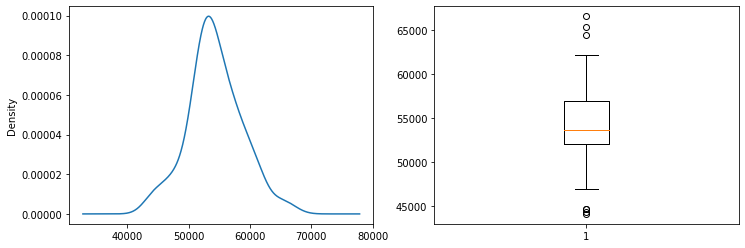

In [24]:
#Univariate analysis pixel

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['pixel'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['pixel'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


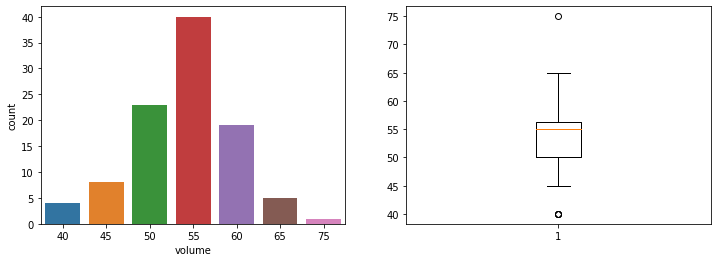

In [18]:
#Univariate analysis volume.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['volume'])

f.add_subplot(1,2,2)
plt.boxplot(df['volume'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


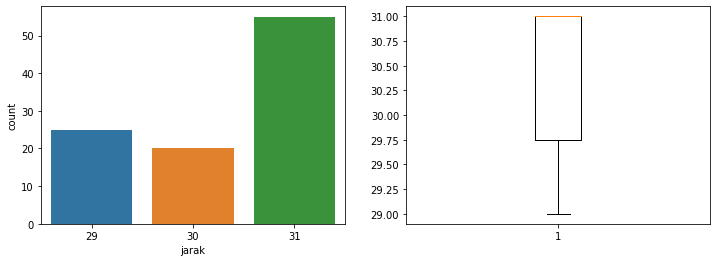

In [25]:
#Univariate analysis jarak

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['jarak'])

f.add_subplot(1,2,2)
plt.boxplot(df['jarak'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

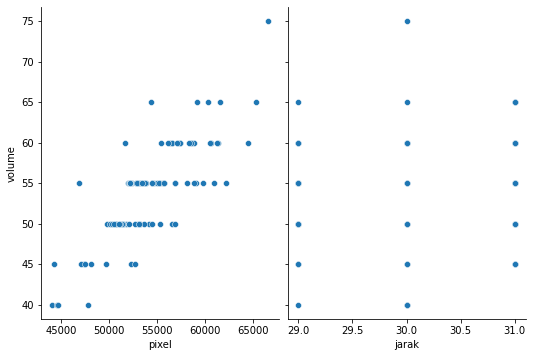

In [26]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['pixel', 'jarak'], y_vars=['volume'], size=5, aspect=0.75)

In [27]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df.corr().style.background_gradient().set_precision(2)

,pixel,volume,jarak
pixel,1.00,0.80,-0.35
volume,0.80,1.00,0.10
jarak,-0.35,0.10,1.00


##Modelling dan melihat akurasi prediksi

In [35]:
#variabel x dan y.
x = df.drop(columns='volume')
y = df['volume']

#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

#object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train.values, y_train.values)

#nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.23845917e-03 2.93286968e+00]
-102.15391461650066


In [38]:
#Accuracy score dengan data test
lin_reg.score(x_test.values, y_test.values)

0.8121499333562108

##Prediksi

In [40]:
lin_reg.predict([[50000, 30]])

array([47.7551341])